# Analysis on the learning activities survey

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataPath = 'data\LearningActivitiesSurveyNumeric2023.csv'
data_raw = pd.read_csv(dataPath)

In [4]:
data_raw.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q3', 'Q4', 'Q5', 'Q6', 'Q10_1',
       'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3',
       'Q11_4', 'Q11_5', 'Q11_6', 'Q11', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4',
       'Q2_5', 'Q2_6', 'Q1', 'Q12', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4',
       'Q13_5', 'Q12.1'],
      dtype='object')

In [5]:
#remove all unfinished responses
completion = data_raw['Finished']

In [6]:
# Throwing away unimportant data
useful_data = data_raw.iloc[:, 17:]

In [7]:
# adding completion back to the dataframe
# all 69 responses
# beware only row 2 onwards are data
useful_data_all = useful_data.merge(completion, left_index=True, right_index=True).iloc[2:, :]

# filtering out unfinished response --> dataframe with only 56 complete responses
useful_data_finished = useful_data_all[useful_data_all['Finished'] == "1"]

In [8]:
useful_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 2 to 70
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Q3        69 non-null     object
 1   Q4        69 non-null     object
 2   Q5        67 non-null     object
 3   Q6        67 non-null     object
 4   Q10_1     60 non-null     object
 5   Q10_2     60 non-null     object
 6   Q10_3     60 non-null     object
 7   Q10_4     60 non-null     object
 8   Q10_5     60 non-null     object
 9   Q10_6     60 non-null     object
 10  Q11_1     60 non-null     object
 11  Q11_2     60 non-null     object
 12  Q11_3     60 non-null     object
 13  Q11_4     60 non-null     object
 14  Q11_5     60 non-null     object
 15  Q11_6     60 non-null     object
 16  Q11       12 non-null     object
 17  Q2_1      58 non-null     object
 18  Q2_2      58 non-null     object
 19  Q2_3      58 non-null     object
 20  Q2_4      58 non-null     object
 21  Q2_5      58 non-n

## Analysis by questions

### Background info

In [9]:
background_info_df = useful_data_all.iloc[:, :4]
background_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 2 to 70
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      69 non-null     object
 1   Q4      69 non-null     object
 2   Q5      67 non-null     object
 3   Q6      67 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


### Concepts


In [10]:
concepts_df = useful_data_all.iloc[:, 4:10].dropna()
concepts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 2 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q10_1   60 non-null     object
 1   Q10_2   60 non-null     object
 2   Q10_3   60 non-null     object
 3   Q10_4   60 non-null     object
 4   Q10_5   60 non-null     object
 5   Q10_6   60 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


In [11]:
concepts_df.columns

Index(['Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6'], dtype='object')

In [12]:
concepts_df['Q10_1'] = concepts_df['Q10_1'].astype(int)
(concepts_df['Q10_1'] == 2).sum()

5

<ul>what do I want to do
    <li>mean and std for each one- average and spread</li>
    <li>percentage of people voted bigger than 4, percentage of people voted 5 - extreme</li>
    <li>percentage of people voted smaller than 2, percentage of people voted 1 - extreme</li>
 </ul>

In [13]:
def calculate(series):
    """
    This function aims to calculate six things 
    1. mean of a series
    2. standard deviation of a series
    3. percentage of people voted 4 and 5
    4. percentage of people voted 5
    5. percentage of people voted 1 and 2
    6. percentage of people voted 1

    INPUT
    -------------
    series: a pandas series

    OUTPUT
    -------------
    A numpy array of the following:
    mean: float, mean of the series
    std: float, standard deviation of a series
    p45: float, percentage of people voted 4 and 5
    p5: float, percentage of people voted 5
    p12: float, percentage of people voted 1 and 2
    p1: float, percentage of people voted 1
    """
    #convert the series into integer 
    series = series.astype(int)
    mean = series.mean()
    std = series.std()

    all_count = series.size
    count_1 = (series == 1).sum()
    count_2 = (series == 2).sum()
    count_4 = (series == 4).sum()
    count_5 = (series == 5).sum()

    p45 = ((count_4 + count_5) / all_count)*100
    p5 = ((count_5) / all_count)*100
    p12 = ((count_1 + count_2) / all_count)*100
    p1 = ((count_1) / all_count)*100

    return np.array([mean, std, p45, p5, p12, p1])


In [14]:
data_type_n_struc = calculate(concepts_df["Q10_1"])
flow_control = calculate(concepts_df["Q10_2"])
variables = calculate(concepts_df["Q10_3"])
syntax = calculate(concepts_df["Q10_4"])
functions = calculate(concepts_df["Q10_5"])
oop = calculate(concepts_df["Q10_6"])

In [15]:
concepts_dict = {'Data types and structures': data_type_n_struc,
                'Flow control structures' : flow_control,
                'Variables declaration' : variables,
                'Basic syntax' : syntax,
                'Functions' : functions,
                'Object-oriented programming' : oop
} 

In [16]:
concepts_result_df = pd.DataFrame(concepts_dict, index = ['mean', 'std', 'percent voted 4 or greater', 'percent voted 5', 'percent voted 2 or lower', 'percent voted 1'])

In [17]:
concepts_result_df

,Data types and structures,Flow control structures,Variables declaration,Basic syntax,Functions,Object-oriented programming
mean,3.850000,3.700000,3.100000,3.616667,3.950000,3.350000
std,0.860134,1.168804,1.244650,1.208608,1.032112,1.190713
percent voted 4 or greater,71.666667,63.333333,38.333333,58.333333,75.000000,46.666667
percent voted 5,21.666667,30.000000,18.333333,30.000000,33.333333,18.333333
percent voted 2 or lower,8.333333,20.000000,40.000000,23.333333,10.000000,20.000000
percent voted 1,0.000000,3.333333,6.666667,3.333333,3.333333,10.000000


https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd

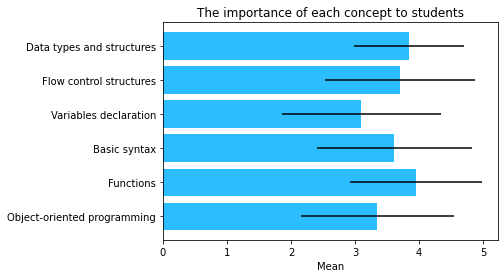

In [19]:
concepts = concepts_result_df.columns
mean = concepts_result_df.iloc[0,:]
std = concepts_result_df.iloc[1,:]
# Fixing random state for reproducibility
np.random.seed(19680801)

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(concepts))

ax.barh(y_pos, mean, xerr=std, align='center')
ax.set_yticks(y_pos, labels=concepts)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mean')
ax.set_title('The importance of each concept to students')

plt.show()

### Topics

In [25]:
topics_df = useful_data_all.iloc[:, 10:16].dropna()
topics_df[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q11_1   62 non-null     object
 1   Q11_2   62 non-null     object
 2   Q11_3   62 non-null     object
 3   Q11_4   62 non-null     object
 4   Q11_5   62 non-null     object
 5   Q11_6   62 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


### Learning activities

In [26]:
activities_df = useful_data_all.iloc[:, 17: 23].dropna()
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q2_1    60 non-null     object
 1   Q2_2    60 non-null     object
 2   Q2_3    60 non-null     object
 3   Q2_4    60 non-null     object
 4   Q2_5    60 non-null     object
 5   Q2_6    60 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


### Feedback

In [15]:
feedback_df = useful_data_all.iloc[:, 25:30].dropna()
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 62
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q13_1   58 non-null     object
 1   Q13_2   58 non-null     object
 2   Q13_3   58 non-null     object
 3   Q13_4   58 non-null     object
 4   Q13_5   58 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


## Analysis by year groups